# Visualization
## Imports and Helpers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm.auto import tqdm, trange

In [ ]:
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'serif'

---

# Reading the data

In [5]:
loc_df = pd.read_csv("csvs/code quality metrics/LOC.csv", header=0, index_col=0)
cc_df = pd.read_csv("csvs/code quality metrics/CC.csv", header=0, index_col=0)
cog_df = pd.read_csv("csvs/code quality metrics/COG.csv", header=0, index_col=0)
halstead_df = pd.read_csv("csvs/code quality metrics/Halstead.csv", header=0, index_col=0)
codebleu_scores_df = pd.read_csv("csvs/code quality metrics/Codebleu_scores.csv")

---

# Plots

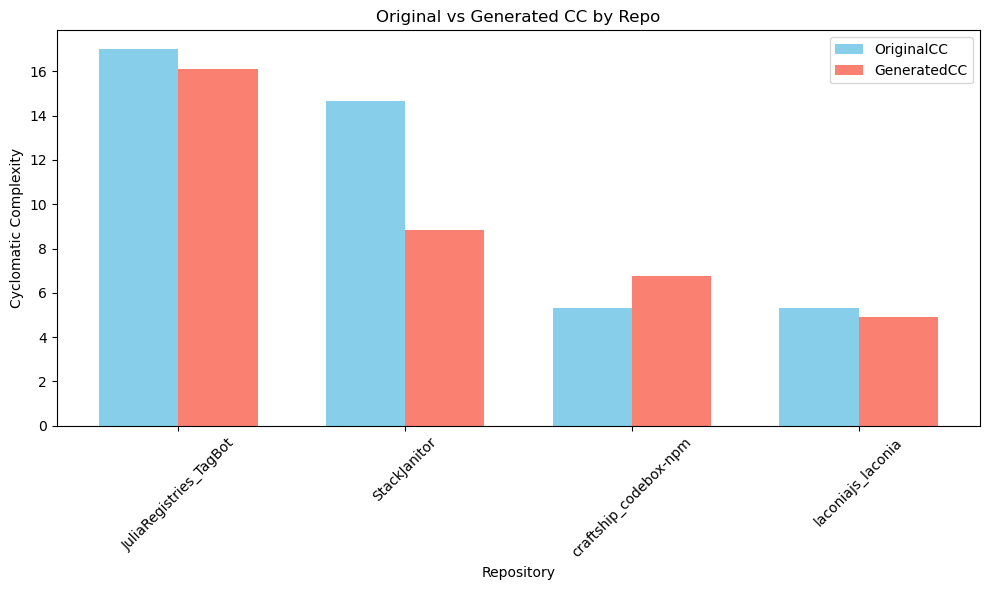

In [4]:
grouped_df = cc_df.groupby("Repo")[["OriginalCC", "GeneratedCC"]].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions = range(len(grouped_df))

ax.bar(bar_positions, grouped_df["OriginalCC"], width=bar_width, label="OriginalCC", color="skyblue")
ax.bar([pos + bar_width for pos in bar_positions], grouped_df["GeneratedCC"], width=bar_width, label="GeneratedCC", color="salmon")

ax.set_xlabel("Repository")
ax.set_ylabel("Cyclomatic Complexity")
ax.set_title("Original vs Generated CC by Repo")
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(grouped_df["Repo"])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
def plot_grouped_chart(df: pd.DataFrame, group_key: str, group_label: str, original_metric_key: str, original_label: str, generated_metric_key: str, generated_label: str, metric_label: str, show: bool=False, save: bool=True):
    grouped_df = df.groupby(group_key)[[original_metric_key, generated_metric_key]].mean().reset_index()

    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.35
    bar_positions = range(len(grouped_df))

    ax.bar(bar_positions, grouped_df[original_metric_key], width=bar_width, label=original_label, color="skyblue")
    ax.bar([pos + bar_width for pos in bar_positions], grouped_df[generated_metric_key], width=bar_width, label=generated_label, color="salmon")

    ax.set_xlabel(group_label)
    ax.set_ylabel(f"Average {metric_label}")
    ax.set_title(f"Average Original vs Generated {metric_label} by {group_label}")
    ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
    ax.set_xticklabels(grouped_df[group_key])
    ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()

    if show:
        plt.show()
    
    if save:
        plt.savefig(f"./plots/{group_key}_original_vs_generated_{metric_label}.png", dpi=600)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

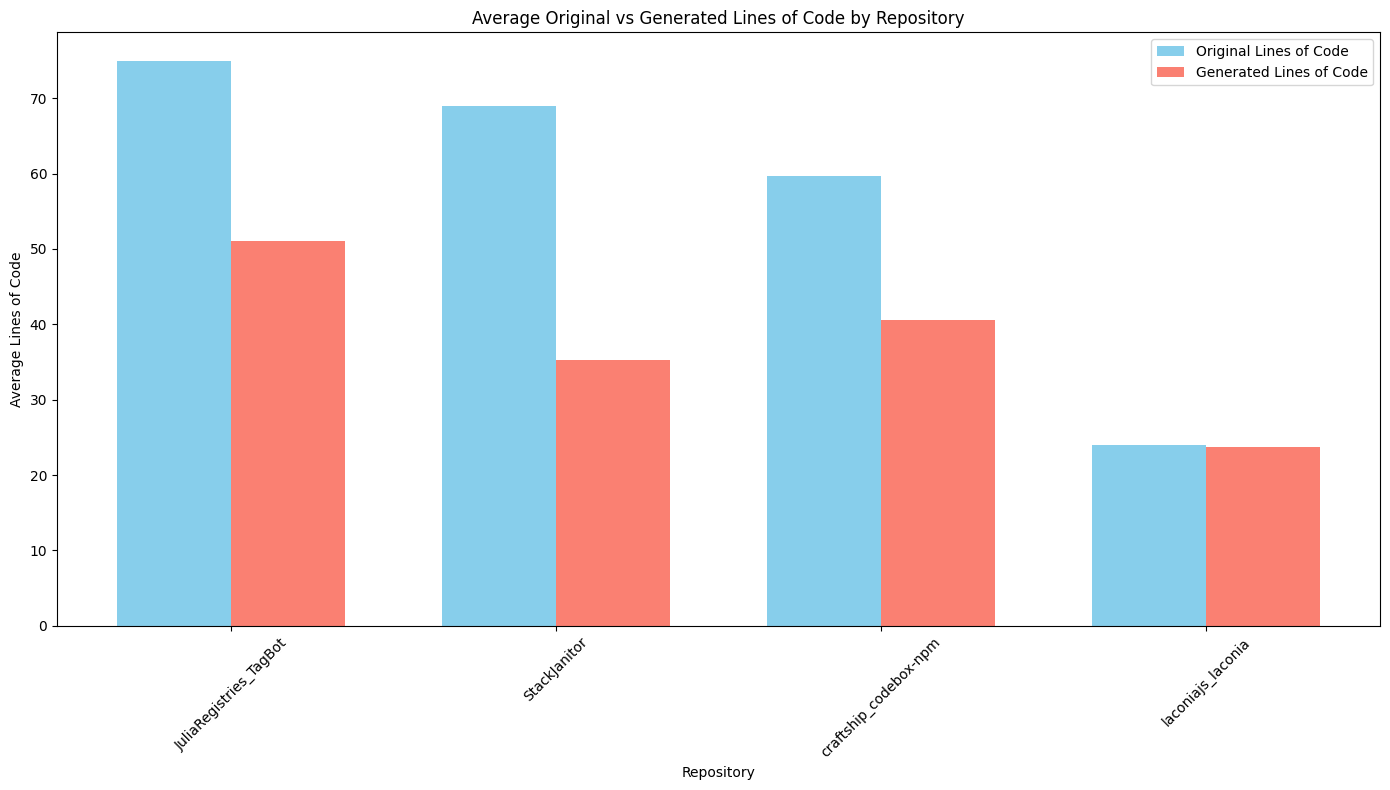

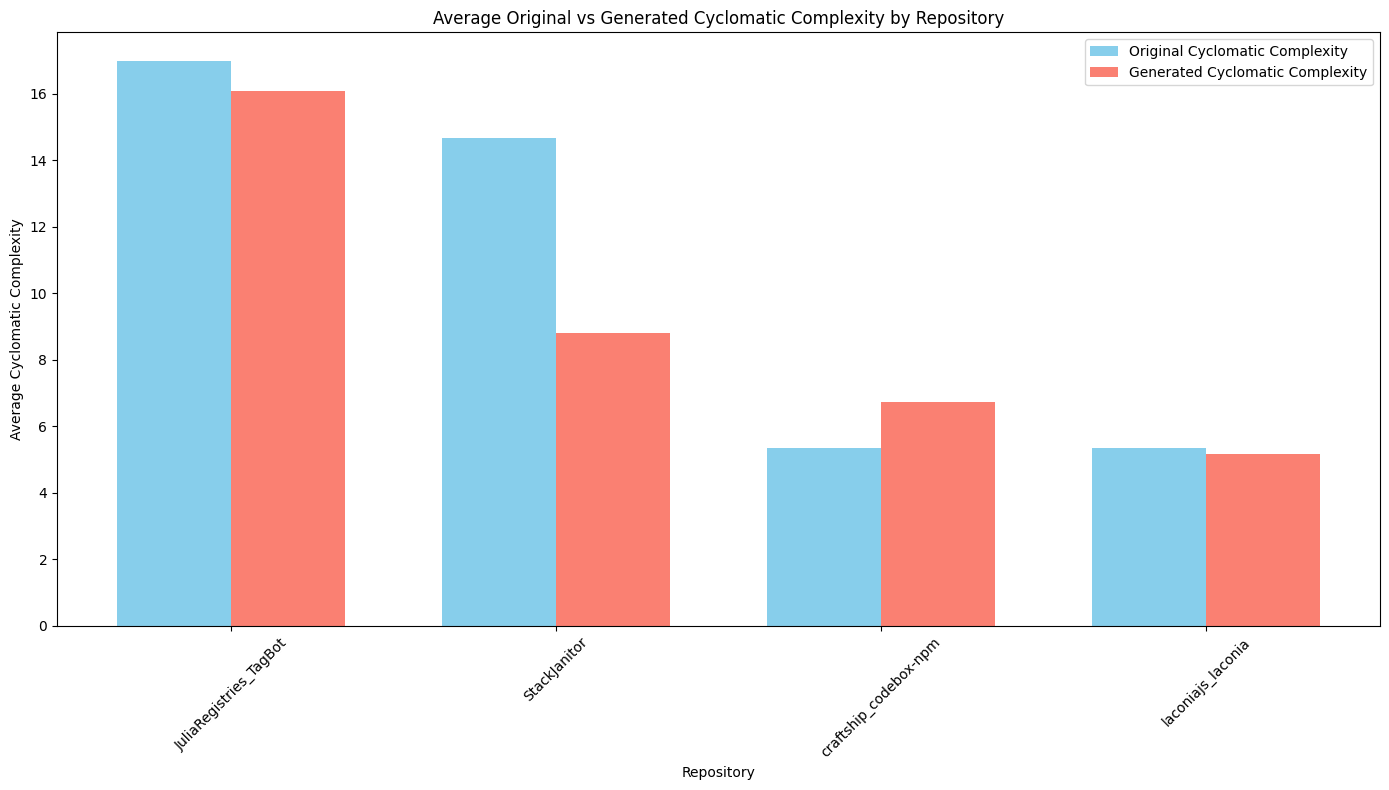

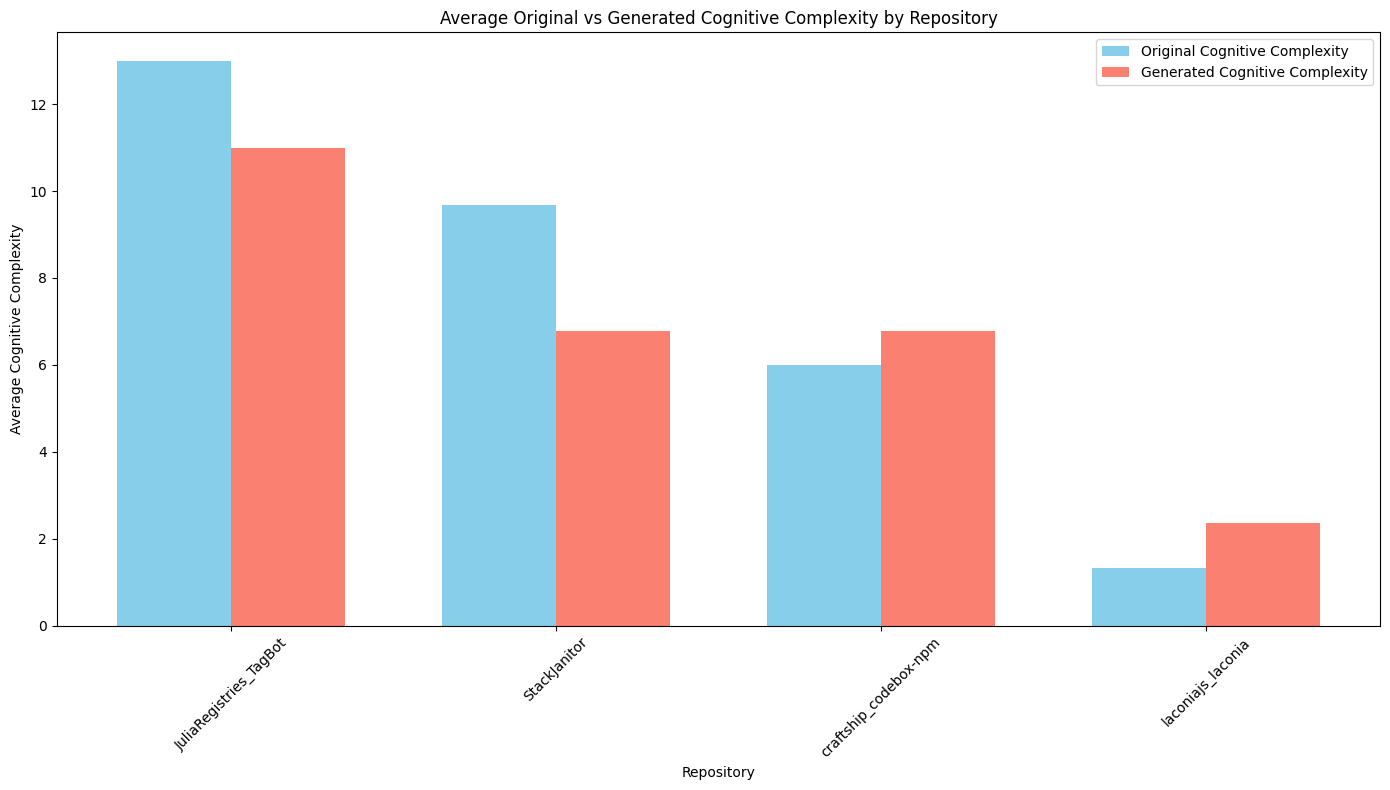

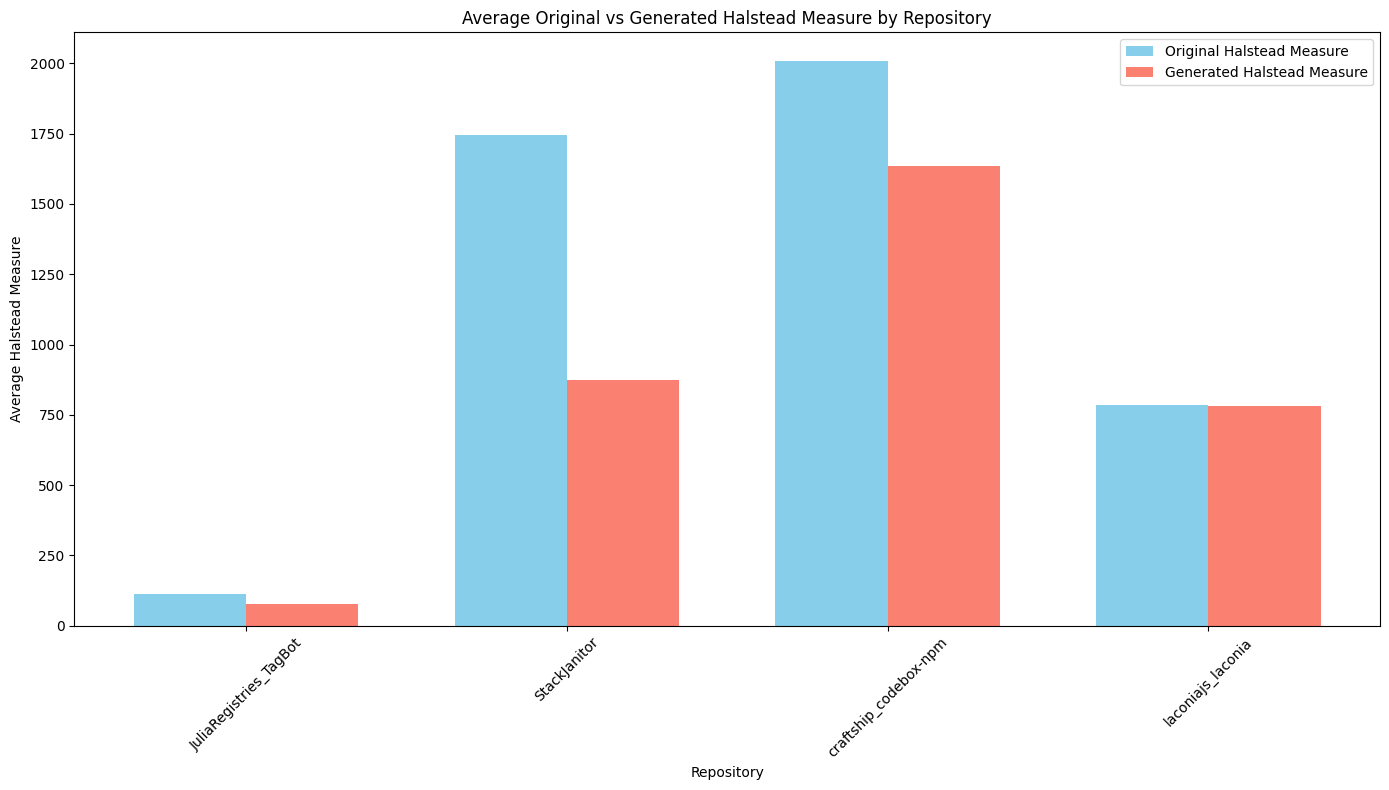

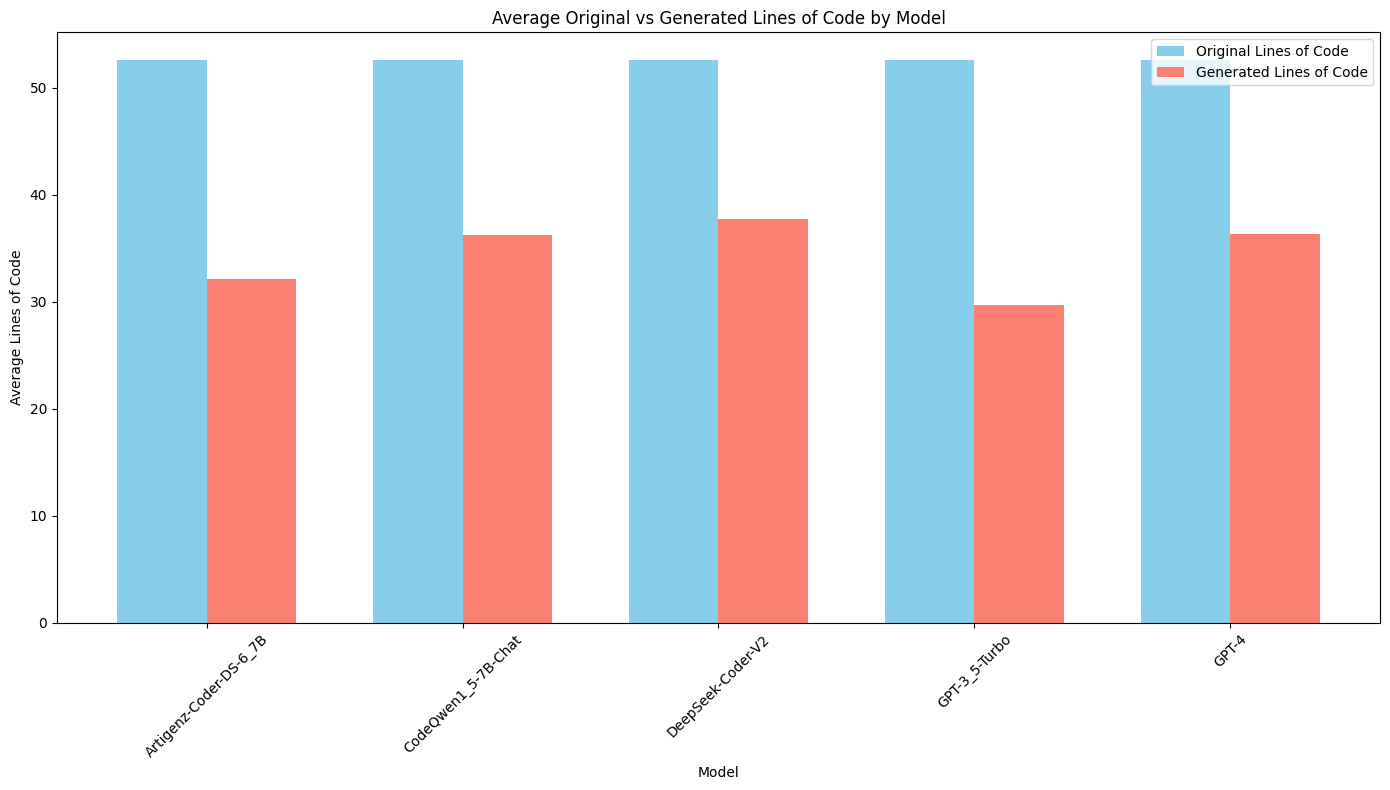

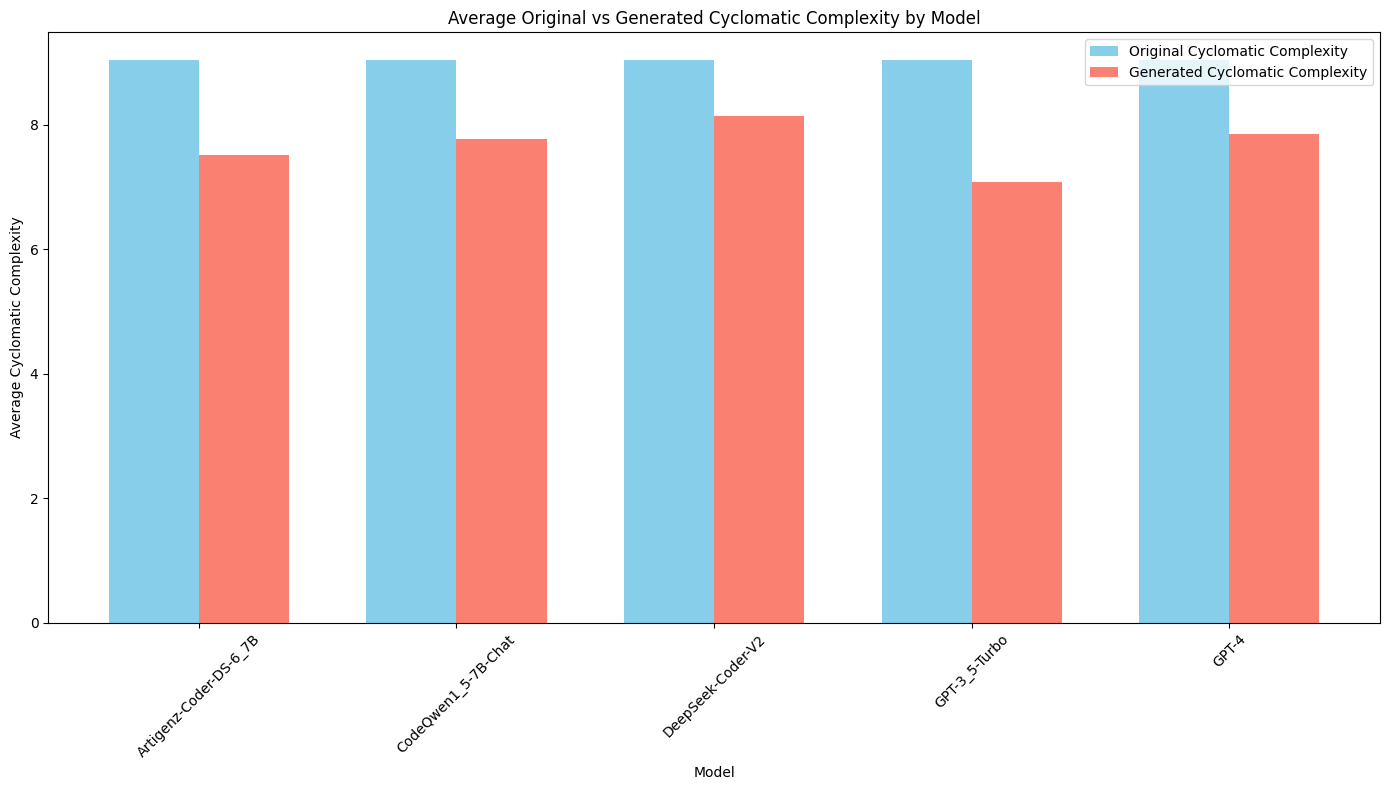

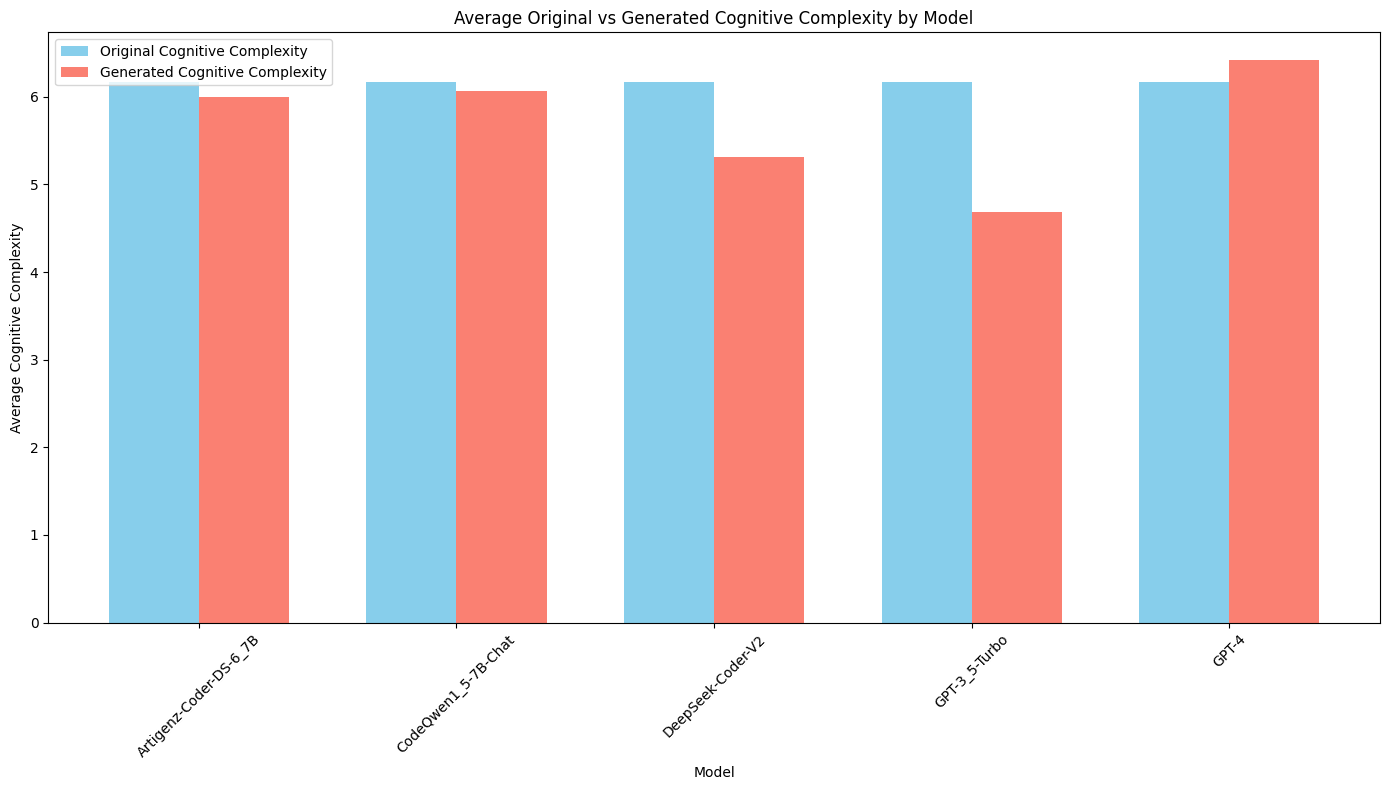

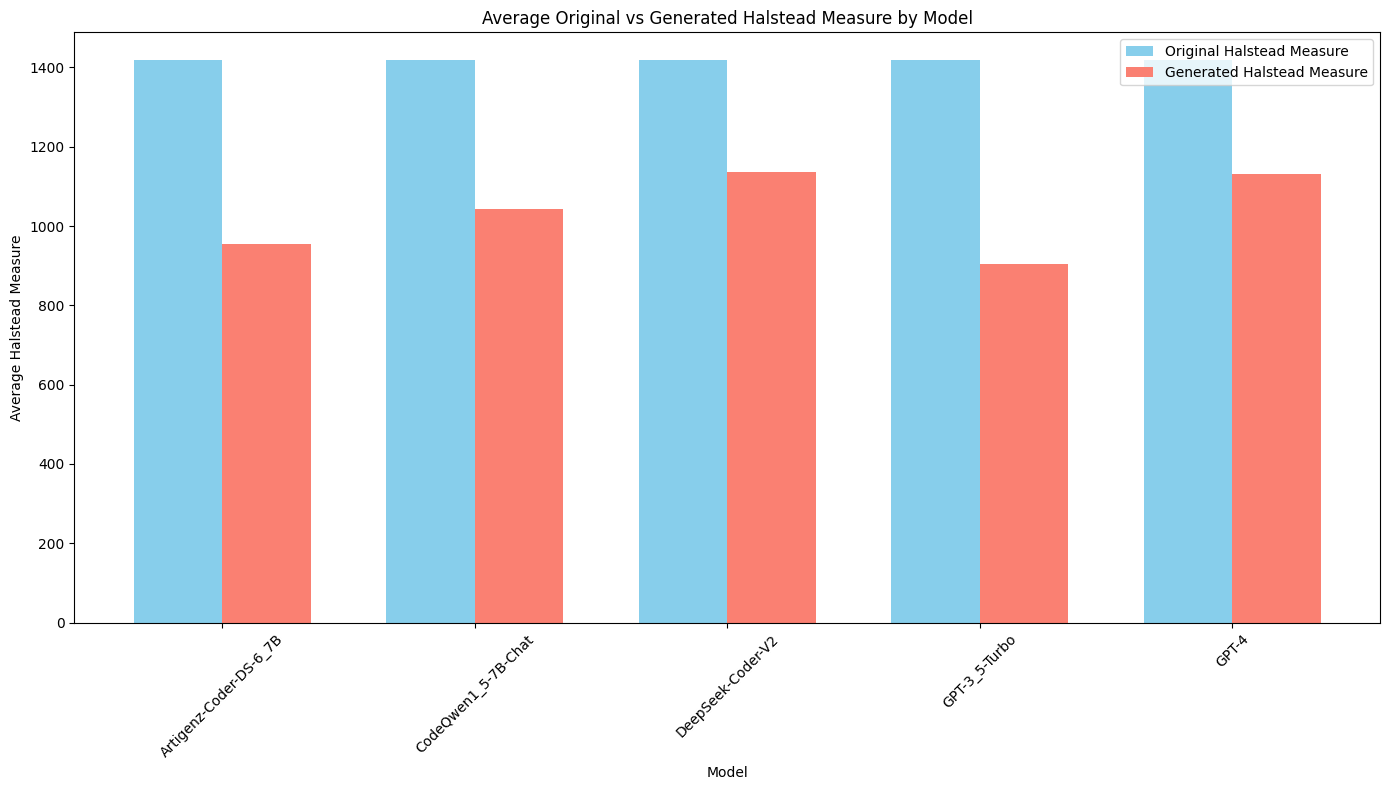

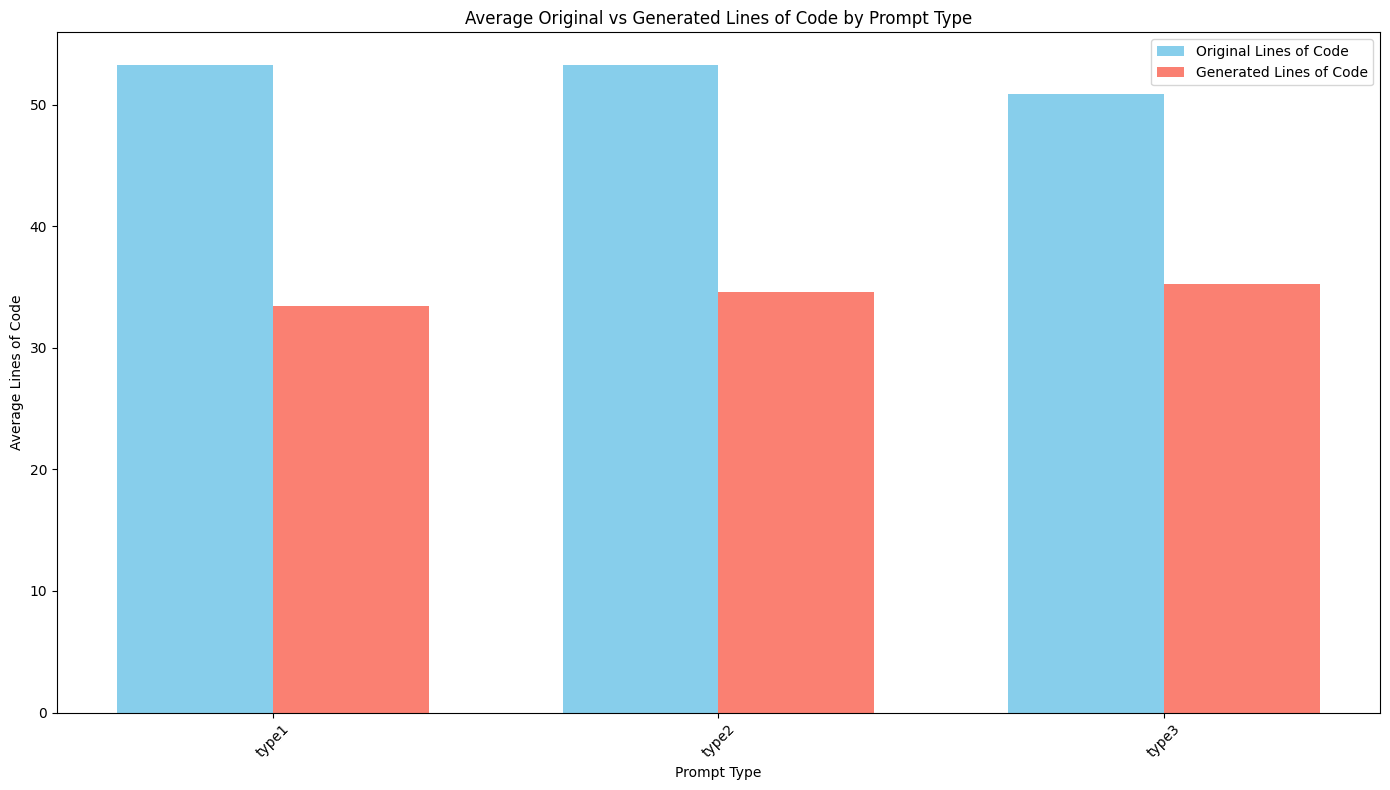

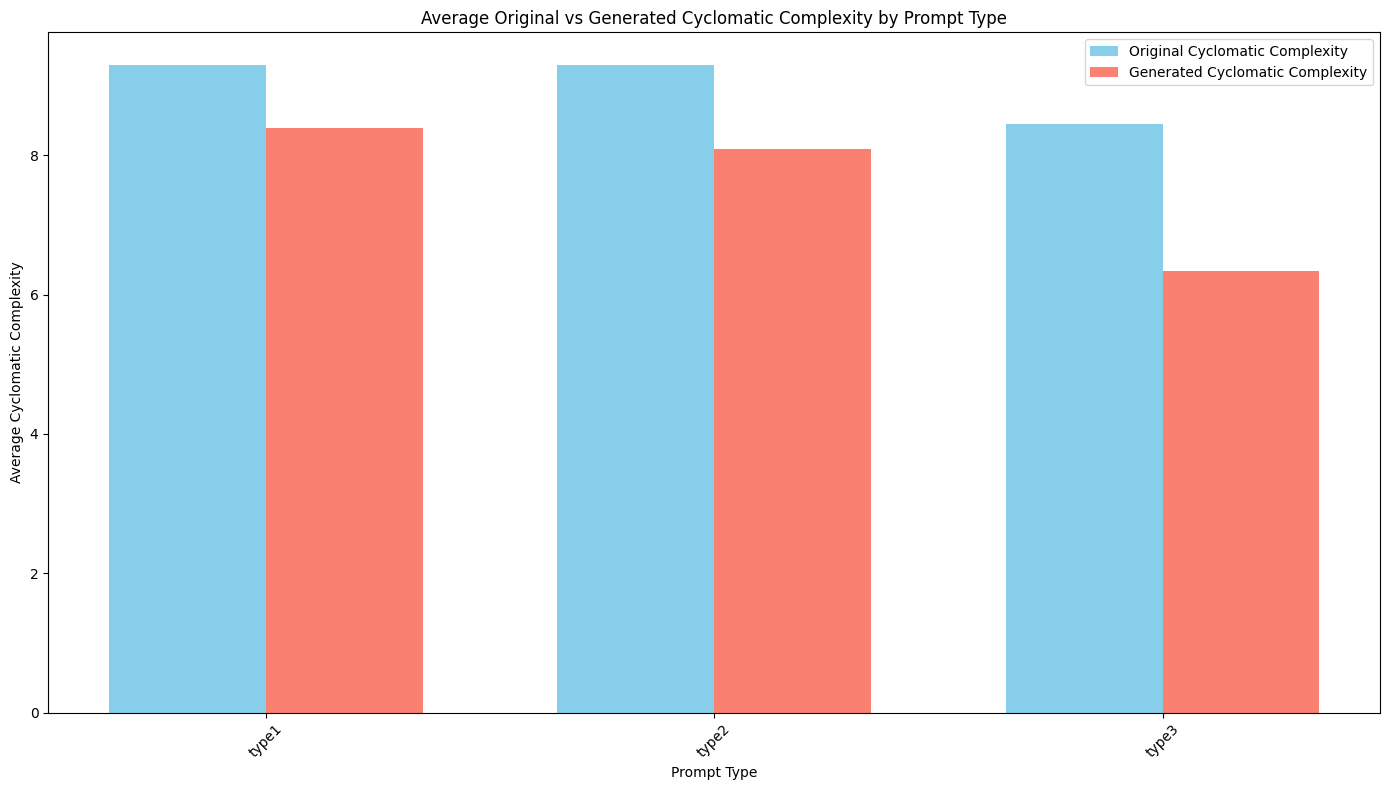

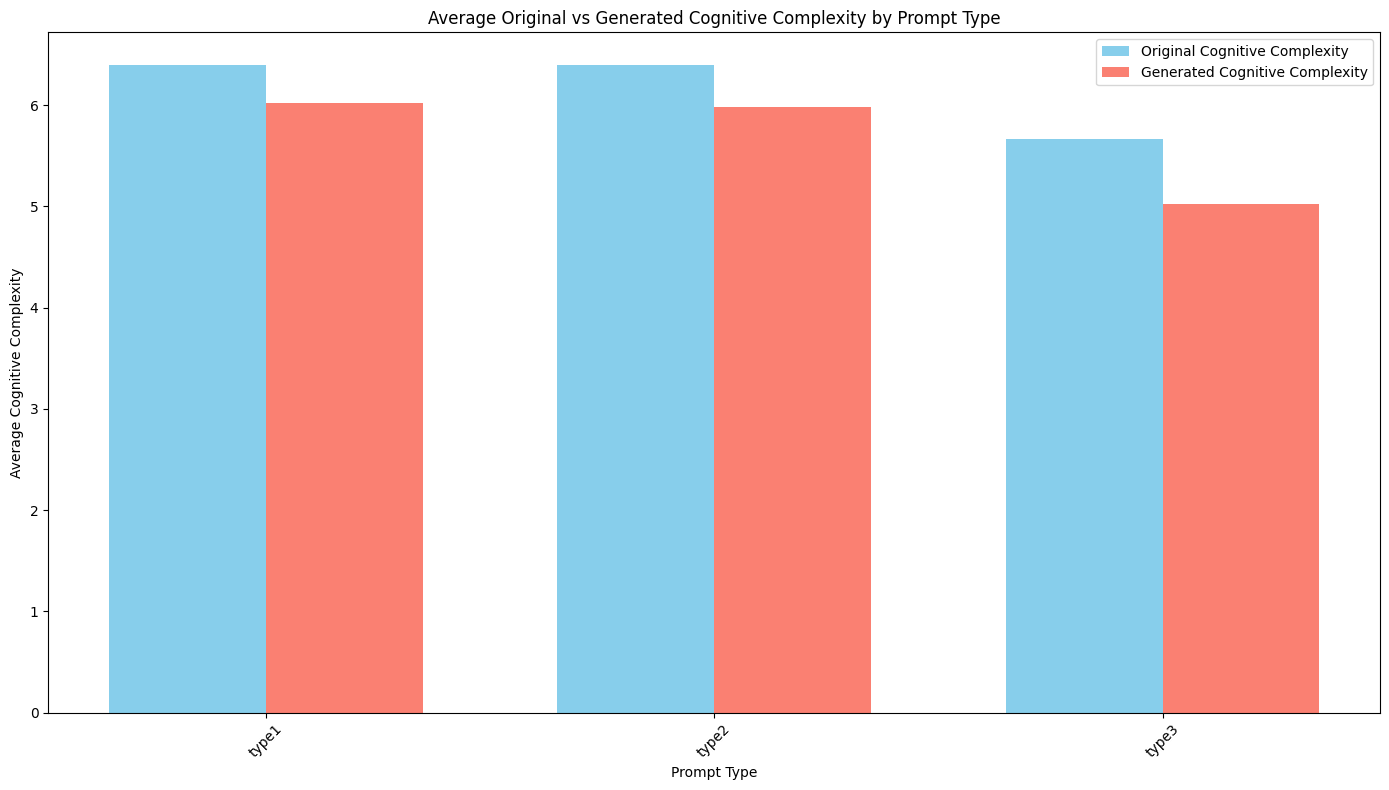

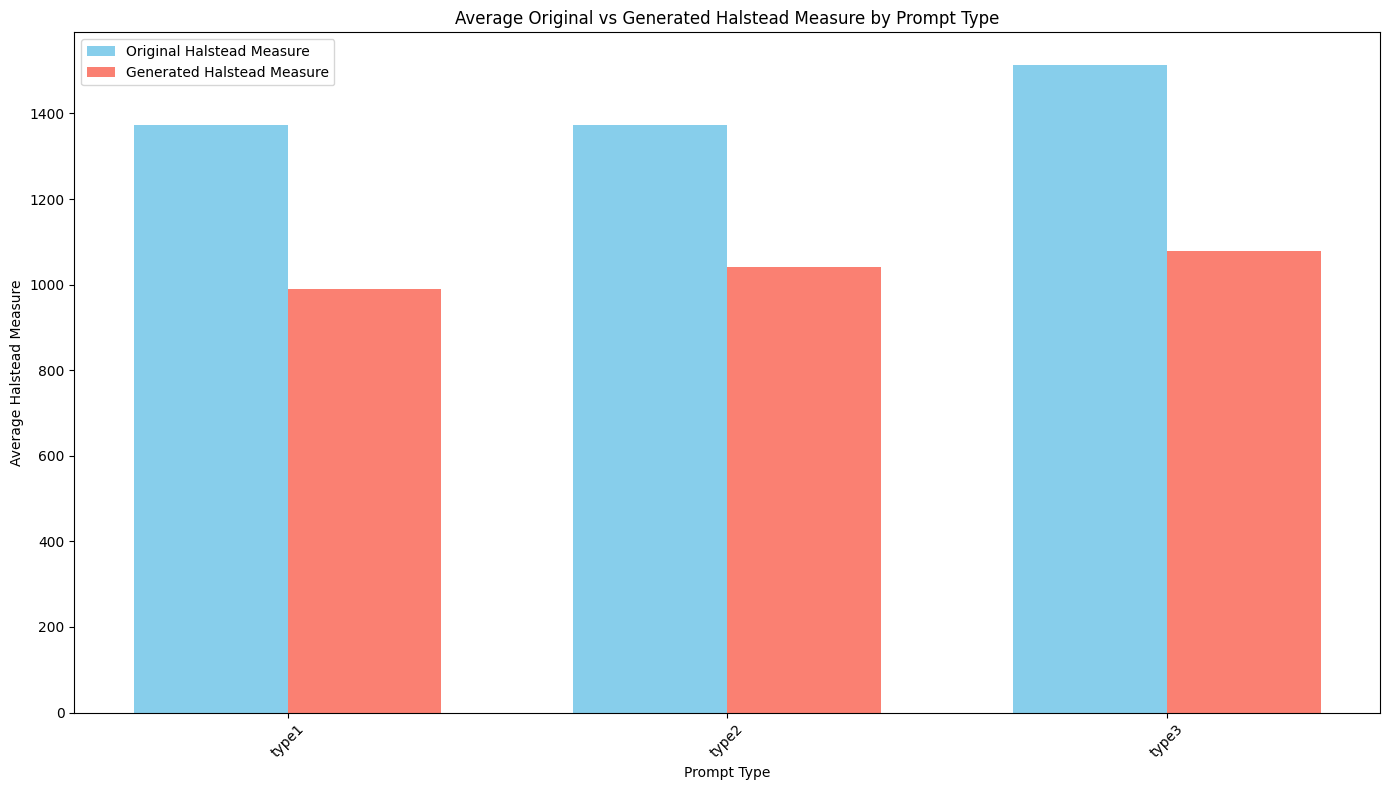

In [26]:
keys_to_group_by = ["Repo", "Model", "PromptType"]
labels = ["Repository", "Model", "Prompt Type"]

original_metrics_keys = ["OriginalLOC", "OriginalCC", "OriginalCOG", "OriginalHalstead"]
generated_metrics_keys = ["GeneratedLOC", "GeneratedCC", "GeneratedCOG", "GeneratedHalstead"]
metric_labels = ["Lines of Code", "Cyclomatic Complexity", "Cognitive Complexity", "Halstead Measure"]

dfs = [loc_df, cc_df, cog_df, halstead_df]

for i in trange(len(keys_to_group_by)):
    for j in trange(len(original_metrics_keys)):
        plot_grouped_chart(dfs[j], keys_to_group_by[i], labels[i], original_metrics_keys[j], f"Original {metric_labels[j]}", generated_metrics_keys[j], f"Generated {metric_labels[j]}", metric_labels[j], save=True)


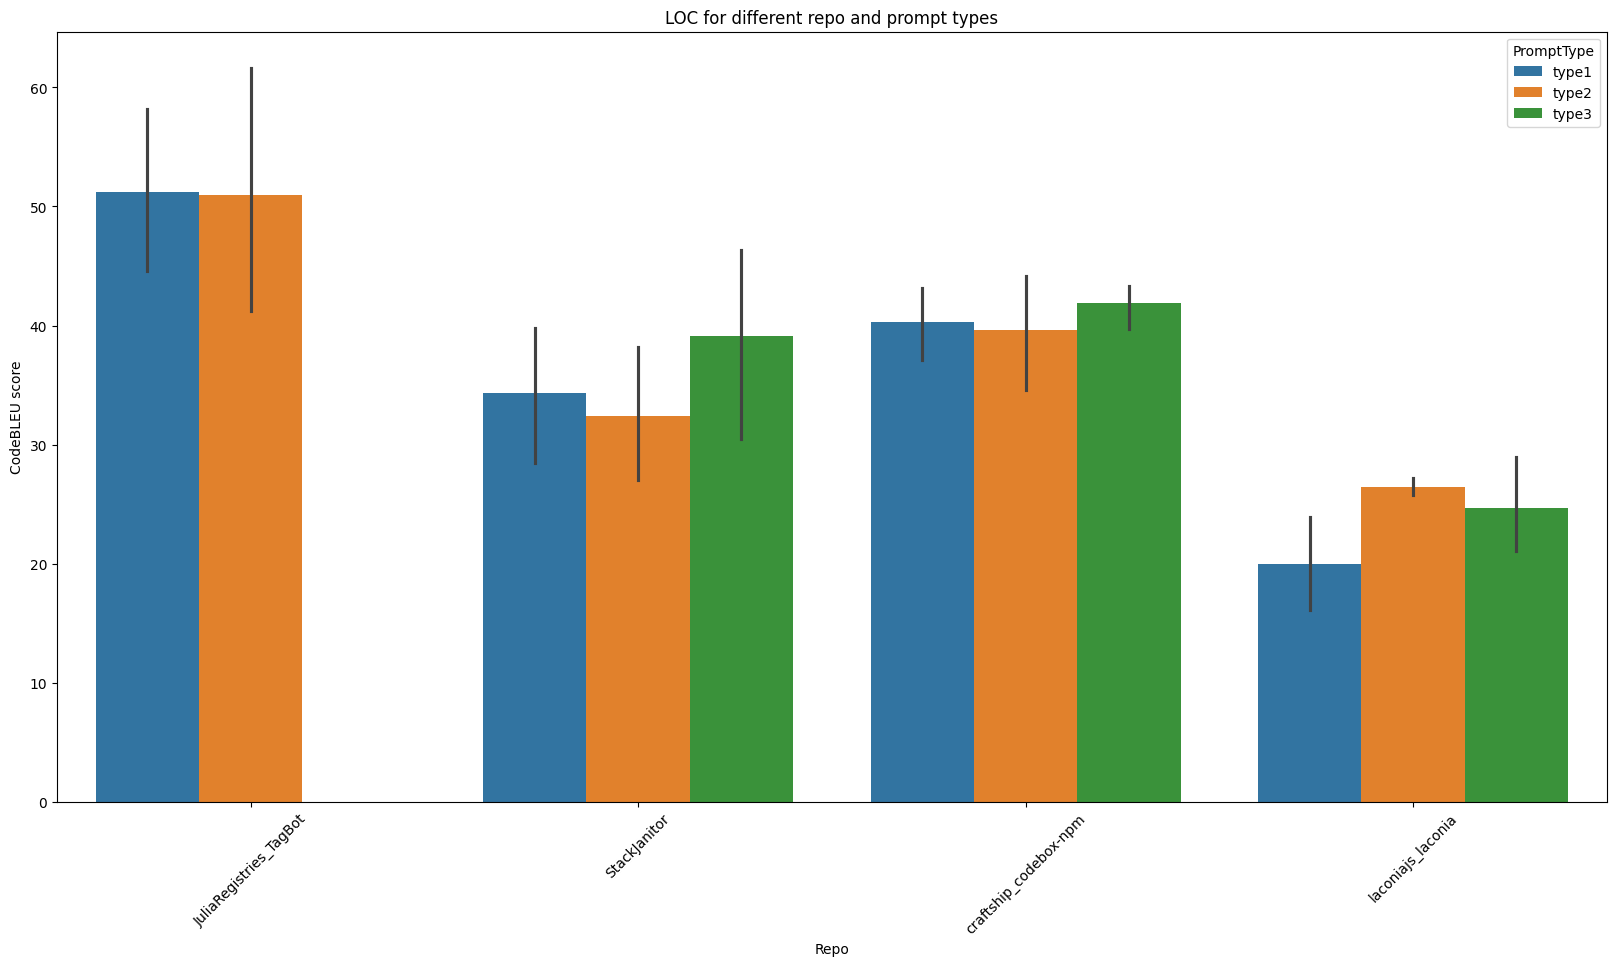

In [10]:
plt.figure(figsize=(20, 10))

loc2_df = loc_df.groupby(["Repo", "Model", "PromptType"], as_index=False)["GeneratedLOC"].mean()

sns.barplot(x="Repo", y="GeneratedLOC", hue="PromptType", data=loc2_df)

plt.title("LOC for different repo and prompt types")
plt.xlabel("Repo")
plt.ylabel("CodeBLEU score")
plt.xticks(rotation=45)
plt.show()


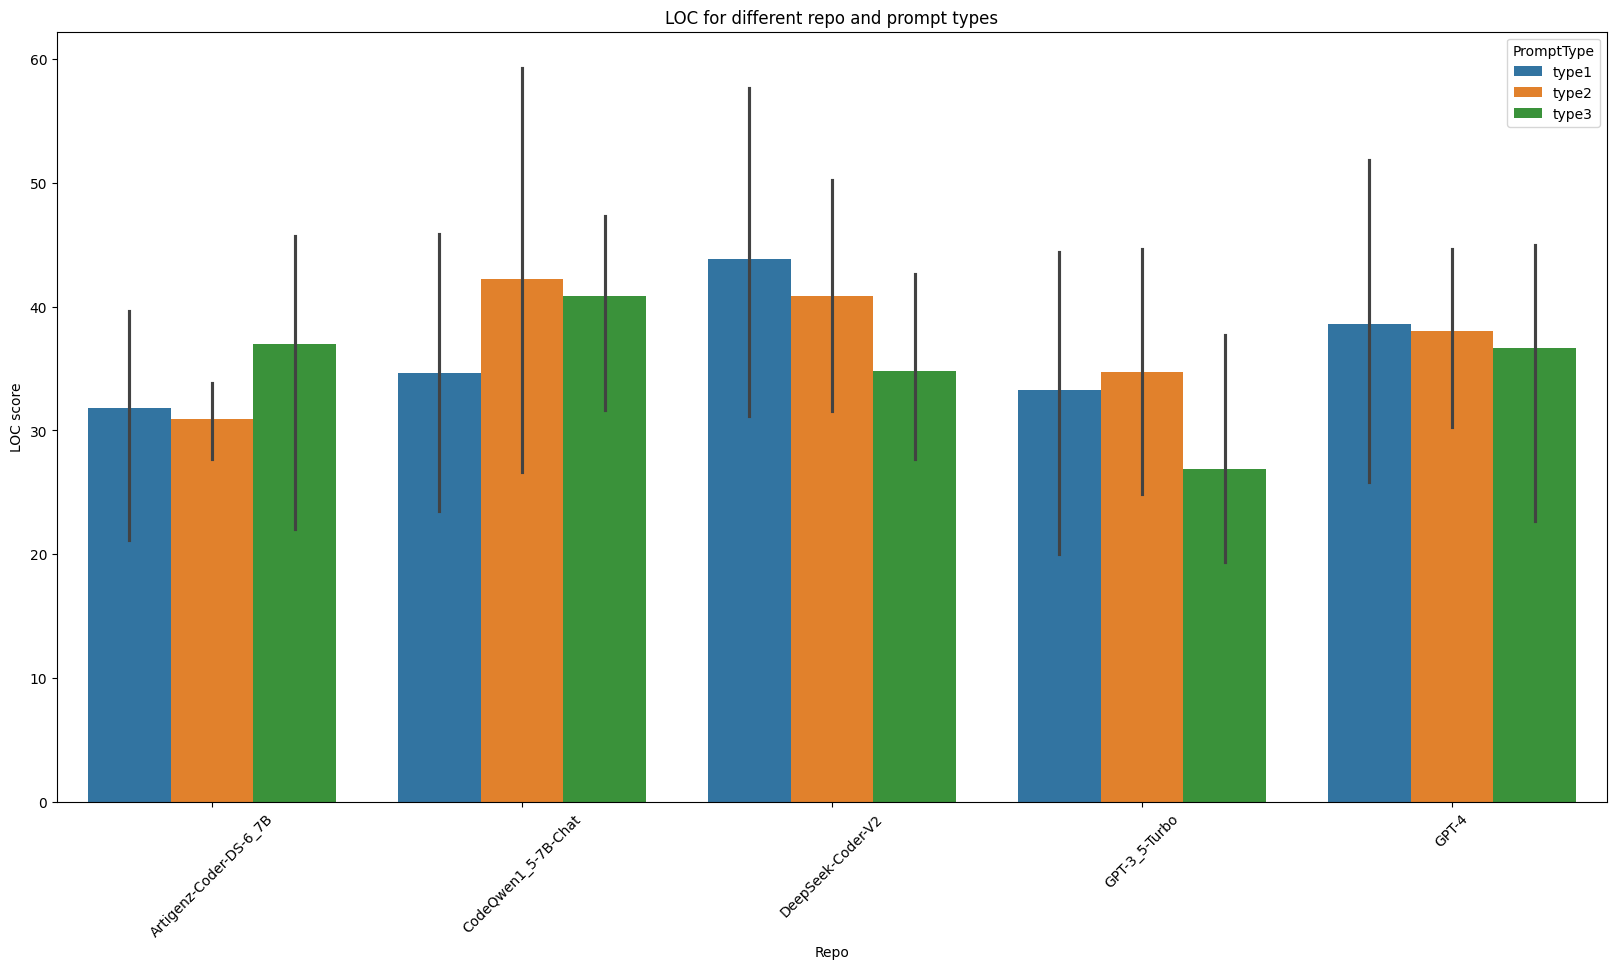

In [12]:
plt.figure(figsize=(20, 10))


loc2_df = loc_df.groupby(["Repo", "Model", "PromptType"], as_index=False)["GeneratedLOC"].mean()

sns.barplot(x="Model", y="GeneratedLOC", hue="PromptType", data=loc2_df)

plt.title("LOC for different repo and prompt types")
plt.xlabel("Repo")
plt.ylabel("LOC score")
plt.xticks(rotation=45)
plt.show()


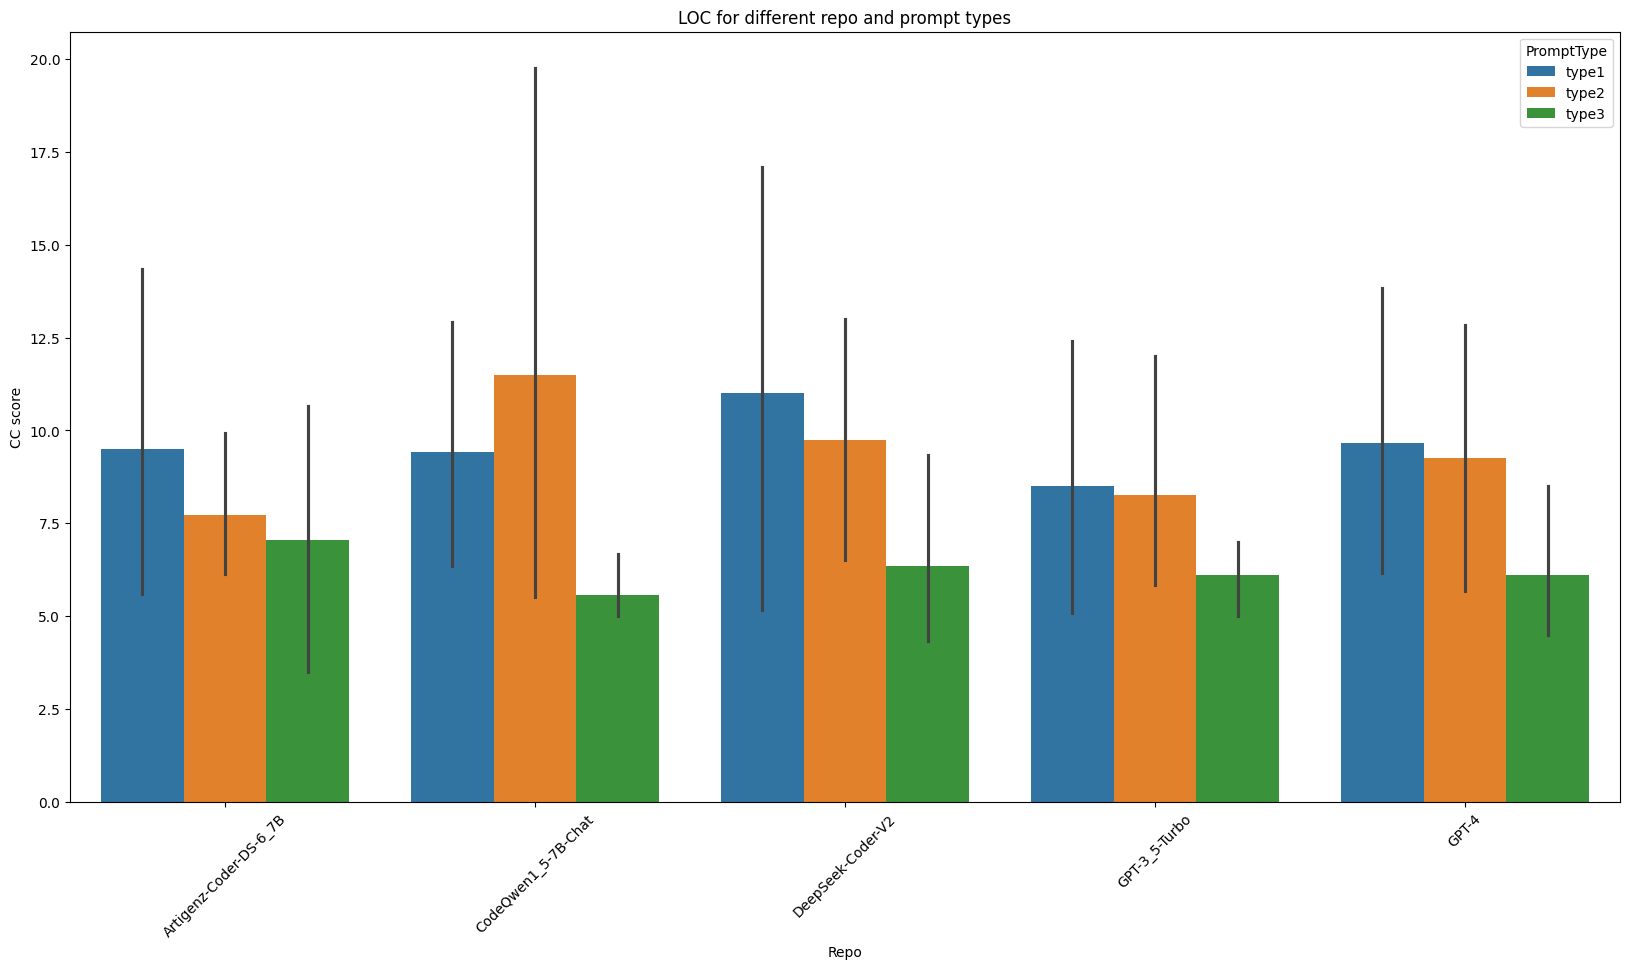

In [13]:
plt.figure(figsize=(20, 10))


data_df = cc_df.groupby(["Repo", "Model", "PromptType"], as_index=False)["GeneratedCC"].mean()

sns.barplot(x="Model", y="GeneratedCC", hue="PromptType", data=data_df)

plt.title("LOC for different repo and prompt types")
plt.xlabel("Repo")
plt.ylabel("CC score")
plt.xticks(rotation=45)
plt.show()


In [19]:
def plot_grouped_chart(df: pd.DataFrame, group_key: str, group_label: str, original_metric_key: str, original_label: str, generated_metric_key: str, generated_label: str, metric_label: str, ax: plt.Axes):
    grouped_df = df.groupby(group_key)[[original_metric_key, generated_metric_key]].mean().reset_index()

    bar_width = 0.35
    bar_positions = range(len(grouped_df))

    ax.bar(bar_positions, grouped_df[original_metric_key], width=bar_width, label=original_label, color="darkblue")
    ax.bar([pos + bar_width for pos in bar_positions], grouped_df[generated_metric_key], width=bar_width, label=generated_label, color="coral")

    ax.set_xlabel(group_label, fontsize=14)
    ax.set_ylabel(f"Average {metric_label}", fontsize=14)
    ax.set_title(f"Average {metric_label}", fontsize=16)
    ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
    if group_key == "Model":
        ax.set_xticklabels(grouped_df[group_key], rotation=45)
        ax.set_xticklabels(["Artigenz-\nCoder-DS-6.7B", "CodeQwen1.5-\n7B-Chat", "DeepSeek\n-Coder-V2", "GPT-3.5-\nTurbo", "GPT-4"], rotation=35)
    elif group_key == "PromptType":
        ax.set_xticklabels(["Type 1", "Type 2", "Type 3"])

In [20]:
keys_to_group_by = ["Model", "PromptType"]
labels = ["Model", "Prompt Type"]

original_metrics_keys = ["OriginalLOC", "OriginalCC", "OriginalCOG", "OriginalHalstead"]
generated_metrics_keys = ["GeneratedLOC", "GeneratedCC", "GeneratedCOG", "GeneratedHalstead"]
metric_labels = ["Source Lines of Code (SLOC)", "Cyclomatic Complexity (CC)", "Cognitive Complexity (COG)", "Halstead Volume"]

dfs = [loc_df, cc_df, cog_df, halstead_df]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

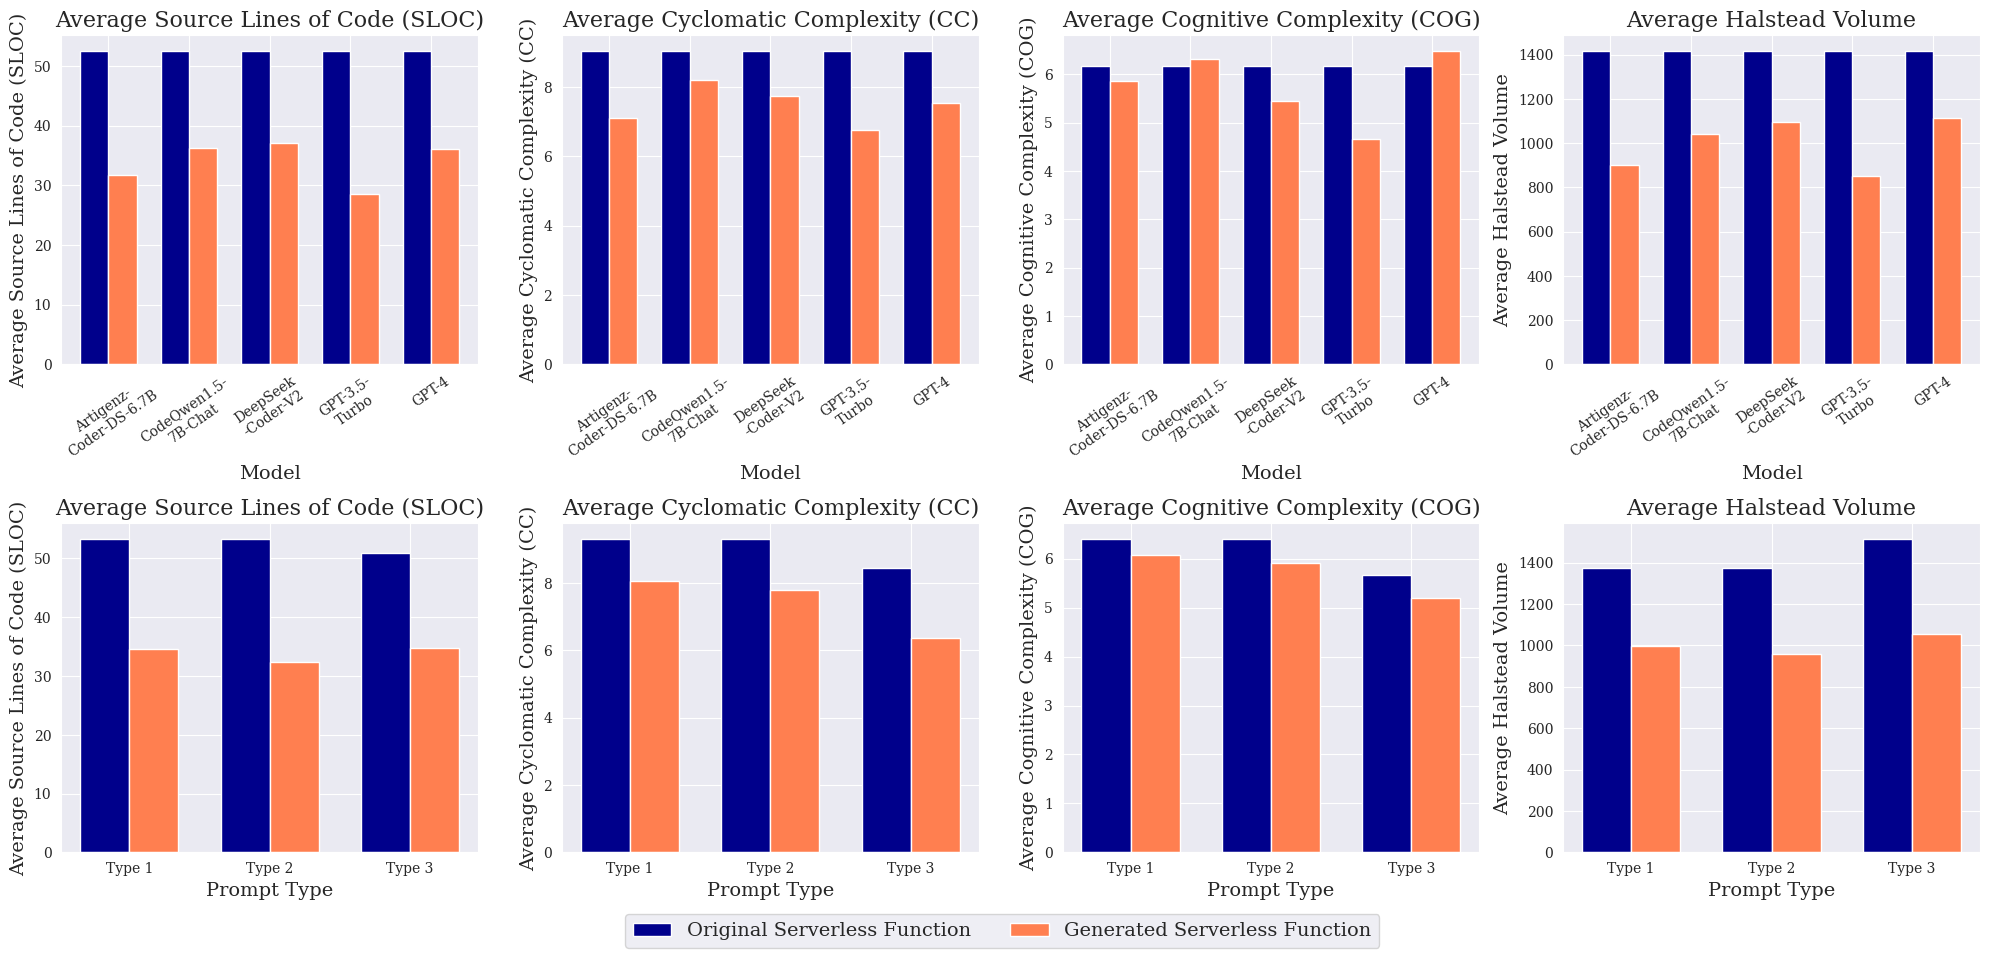

In [21]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i in trange(len(keys_to_group_by)):
    for j in trange(len(original_metrics_keys)):
        plot_grouped_chart(
            dfs[j], 
            keys_to_group_by[i], 
            labels[i], 
            original_metrics_keys[j], 
            f"Original {metric_labels[j]}", 
            generated_metrics_keys[j], 
            f"Generated {metric_labels[j]}", 
            metric_labels[j], 
            ax=axs[i, j]
        )

handles, label = axs[0, 0].get_legend_handles_labels()
label = ["Original Serverless Function", "Generated Serverless Function"]
fig.legend(handles, label, loc='upper left', bbox_to_anchor=(0.31, 0.04), prop={'size': 14}, ncol=2)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f"plots/original_vs_generated_Code_Metrics.png", dpi=600, bbox_inches='tight')
plt.show()

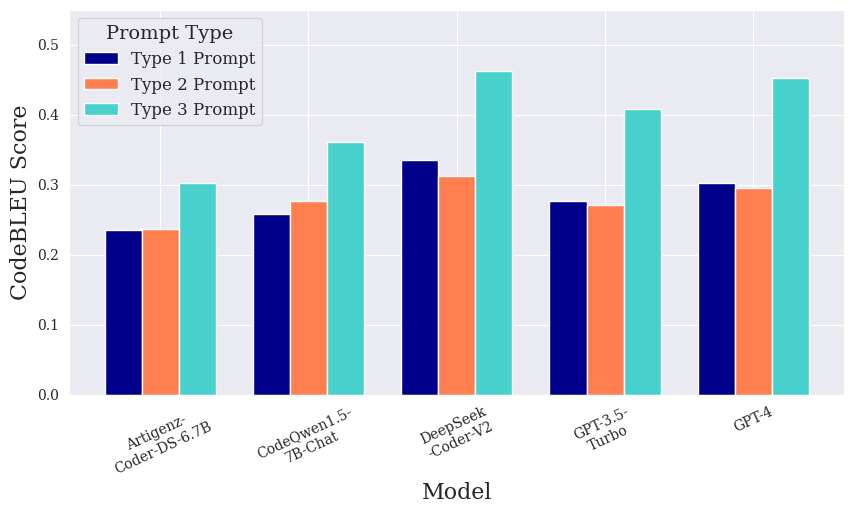

In [25]:
average_codebleu_scores = codebleu_scores_df.groupby(["Model", "PromptType"], as_index=False)["CodeBLEU"].mean()

models = average_codebleu_scores["Model"].unique()
prompt_types = average_codebleu_scores["PromptType"].unique()
colors = ["darkblue", "coral", "mediumturquoise"]

bar_width = 0.25
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 5))
for i, prompt_type in enumerate(prompt_types):
    data = average_codebleu_scores[average_codebleu_scores["PromptType"] == prompt_type]
    ax.bar(x + i * bar_width, data["CodeBLEU"], width=bar_width, label=f"Type {i + 1} Prompt", color=colors[i])

ax.set_xlabel("Model", fontsize=16)
ax.set_ylabel("CodeBLEU Score", fontsize=16)
ax.set_ylim(0, 0.55)
ax.set_xticks(x + bar_width * (len(prompt_types) - 1) / 2)
ax.set_xticklabels(["Artigenz-\nCoder-DS-6.7B", "CodeQwen1.5-\n7B-Chat", "DeepSeek\n-Coder-V2", "GPT-3.5-\nTurbo", "GPT-4"], rotation=25)
ax.legend(title="Prompt Type", fontsize=12, title_fontsize=14)

plt.savefig("plots/CodeBLEU Scores.png", dpi=1100, bbox_inches="tight")
plt.show()

---